<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Confidence Intervals Using the Normal Distribution

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

**1. Load "tips" dataset from Seaborn library**

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


**2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:**

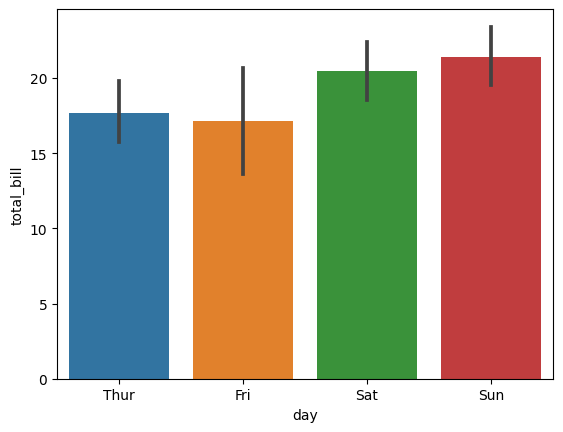

In [5]:
sns.barplot(x="day", y="total_bill", data=tips, errorbar=('ci', 95));

**3. Subset a dataframe just including Sunday tips**

In [6]:
tipsSun = tips[tips['day'] == "Sun"]

In [7]:
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tipsSun.shape

(76, 7)

**4. Calculate mean and std**

In [9]:
tipsSun["total_bill"].mean()

21.41

In [10]:
tipsSun["total_bill"].std()

8.832121828869889

**5. Calculate standard error of the mean (sem)**

**[What Is the Standard Error of the Mean (SEM)?](https://www.indeed.com/career-advice/career-development/standard-error-mean)**

**[Standard Error of the Mean (SEM)](https://statisticsbyjim.com/hypothesis-testing/standard-error-mean/)**

<img src=https://i.ibb.co/WgqgQmh/sd.png width="350" height="200">

<img src=https://i.ibb.co/1XkTmQb/sem.png width="350" height="200">

In [11]:
sem = tipsSun["total_bill"].std() / np.sqrt(tipsSun.shape[0])

In [12]:
sem

1.0131138555021968

In [13]:
tipsSun["total_bill"].sem()

1.0131138555021968

**6. Calculate the margin of error (95%)**

In [14]:
moe = 1.96 * sem

In [15]:
moe

1.9857031567843058

**7. Calculate the upper confidence limit**

<img src=https://i.ibb.co/rpzg7MM/ci.png width="450" height="200">

<img src=https://i.ibb.co/tpfSzrY/ci1.png width="450" height="200">

In [16]:
upper_lim = tipsSun["total_bill"].mean() + moe
upper_lim

23.395703156784307

**8. Calculate the lower confidence limit**

In [17]:
low_lim = tipsSun["total_bill"].mean() - moe
low_lim

19.424296843215693

**9. Calculate 95% Confidence Interval around the mean by using scipy.stats.**

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and we can use the **``norm.interval()``** function from the scipy.stats library.

**[Statistical Tests in Scipy Library](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests)**

In [ ]:
#help(stats.norm.interval)

In [18]:
ci_z = stats.norm.interval(0.95, tipsSun["total_bill"].mean(), sem)
ci_z

(19.424333330977177, 23.395666669022823)

In [19]:
ci_t = stats.t.interval(0.95,
                        len(tipsSun["total_bill"])-1,
                        loc=tipsSun["total_bill"].mean(),
                        scale=tipsSun["total_bill"].sem())
ci_t

(19.39177370652103, 23.42822629347897)

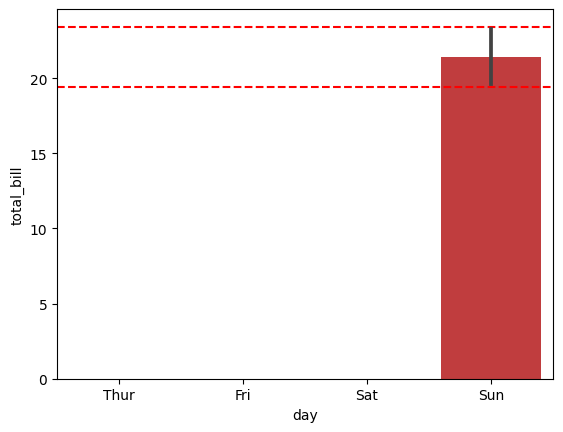

In [27]:
plt.axhline(y = ci_t[0], color = 'r', ls= '--')
plt.axhline(y = ci_t[1], color = 'r', ls= '--')
sns.barplot(x="day", y="total_bill", data=tipsSun, errorbar=('ci', 95));

<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>